# Lab3 : Interpolación

## 1) La grange

In [35]:
def ilagrange(xList,yList,zList):
    assert len(xList) == len(yList)
    
    def Li(x,i):
        l = 1
        xi= xList[i]
        for xj in xList:
            if xj != xi:
                l *= (x-xj)/(xi-xj)
        return l
    
    def P(x):
        p = 0
        for i,y in enumerate(yList):
            p += y*Li(x,i)
        return p
    
    return [P(z) for z in zList]

Probando Lagrange

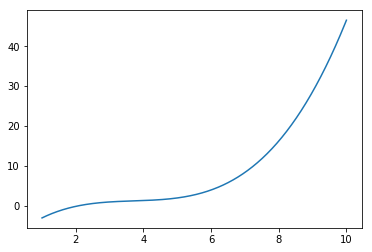

In [36]:
import matplotlib.pyplot as plt
import numpy as np

x = [3,1,5,6]
y = [1,-3,2,4]
z = np.linspace(1, 10, 500)

w = ilagrange(x, y, z)

plt.plot(z, w)
plt.show()


## 2) Método de Newton con diferencias divididas


In [37]:
def inewton(xList,yList,zList):
    assert len(xList) == len(yList)
    xList = np.array(xList,np.float32)
    yList = np.array(yList,np.float32)
    m = len(xList)
    
    F = np.copy(yList)
    for k in range(1,m):
        F[k:m] = (F[k:m] - F[k-1]) / (xList[k:m]-xList[k-1])
    def P(x):
        p = F[0]
        mult = 1
        for k in range(1,m):
            mult *= (x-xList[k-1]) 
            p += F[k]*mult 
        return p
    
    return [P(z) for z in zList]

Probamos Newton

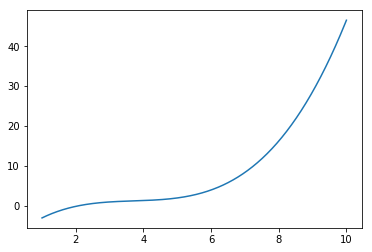

In [38]:
import matplotlib.pyplot as plt

x = [3,1,5,6]
y = [1,-3,2,4]
z = np.linspace(1, 10, 500)
w = inewton(x, y, z)

plt.plot(z, w)
plt.show()

## 3) Función interpolante de Newton con la función real

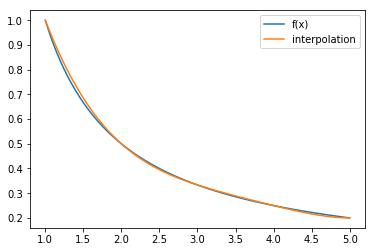

In [39]:
import matplotlib.pyplot as plt

def f(x):
    return 1/x
zList = [(24/25) + (j/25) for j in range(1, 102)]
fList = [f(z) for z in zList]

xList = range(1, 6)
yList = [f(x) for x in xList]

newton_w_val = inewton(xList, yList, zList)

plt.plot(zList, fList, label='f(x)')
plt.plot(zList, newton_w_val, label='interpolation')
plt.legend()
plt.show()

## 4) Interpolación

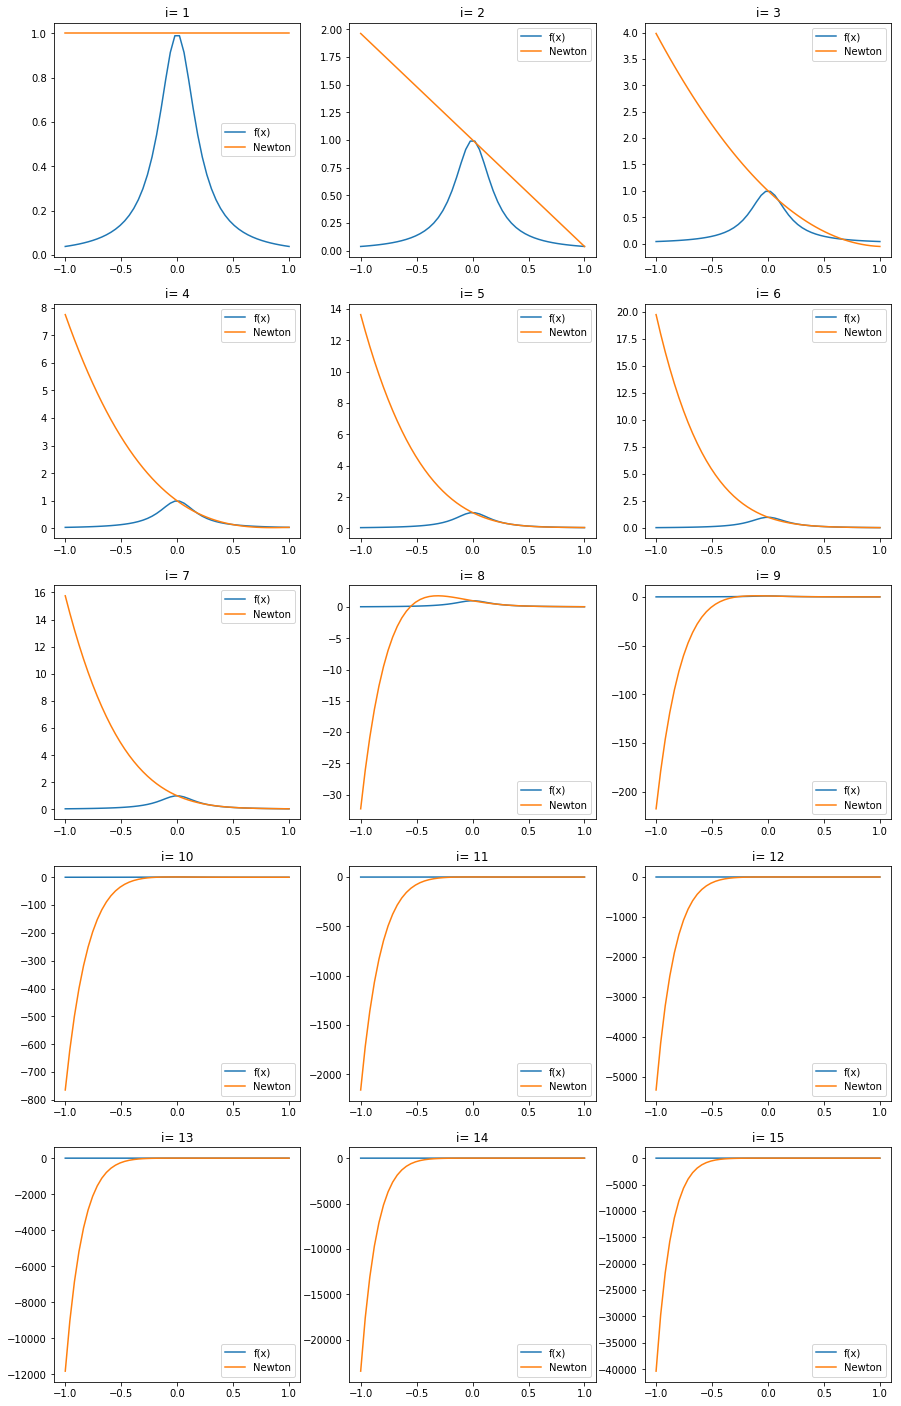

In [40]:
def f(x):
    return 1/(1 + 25*pow(x, 2))

def get_x_data(n):
    return [(2*(i - 1))/n for i in range(1, n+1)]
                                                
z_space = np.linspace(-1, 1)                                                                                                                                                                                                                                                                                                            

n = 15
# create subplot with 5 rows and 3 cols
fig, ax = plt.subplots(int(n/3), 3, figsize=(15, n/3 * 5))
ax = ax.ravel()
for i in range(1,n+1):
    j = i -1
    ax[j].set_title('i= ' + str(i))
    ax[j].plot(z_space,[f(z) for z in z_space],label='f(x)')
    
    xData = get_x_data(i)
    yData = [f(x) for x in xData]
    
    newtonW = inewton(xData,yData,z_space)
    ax[j].plot(z_space,newtonW,label='Newton')
    ax[j].legend()
plt.show()

## 5) Interpolación por spline cúbico
Nos interesa la temperatura media -->

In [49]:
import pandas as pd

df = pd.read_csv('cba_aerodrome/cba_aerodrome_historicos.csv', sep='\t')
df = df.replace('-', np.nan)
df = df[['Año', 'T']]

data = df.to_numpy().astype(np.float)
data = np.moveaxis(data, -1, 0)
idx = np.logical_not(np.isnan(data[1]))

xData = data[0][idx]
yData = data[1][idx]

Datos de temperatura media anual --> 

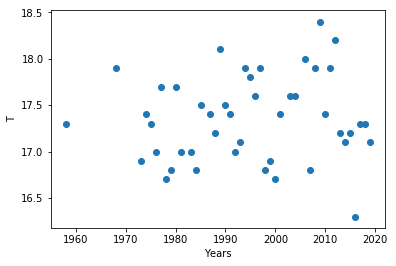

In [50]:
plt.scatter(xData, yData)
plt.xlabel('Years')
plt.ylabel('T')
plt.show()

Aplico Spline cúbico

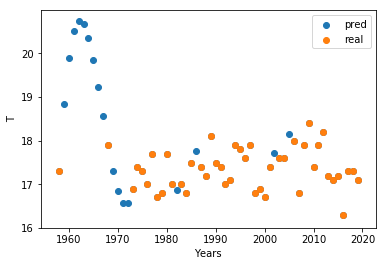

In [54]:
import scipy as sp
import scipy.interpolate

zData = range(1955,2022)
cubic_spline = sp.interpolate.interp1d(xData, yData, kind='cubic', bounds_error=False)
zSpline = cubic_spline(zData)
plt.xlabel('Years')
plt.ylabel('T')
plt.scatter(zData,zSpline,label = 'pred')
plt.scatter(xData,yData,label = 'real')
plt.legend()
plt.show()

Extrapoló

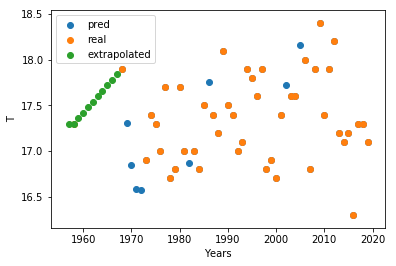

In [56]:
zDataExtrapolated = range(1957, 1968)
zExtrapolated = np.interp(zDataExtrapolated, xData, yData)
zData = range(1968,2022)
zSpline = cubic_spline(zData)
plt.xlabel('Years')
plt.ylabel('T')
plt.scatter(zData,zSpline,label = 'pred')
plt.scatter(xData,yData,label = 'real')
plt.scatter(zDataExtrapolated,zExtrapolated,label = 'extrapolated')
plt.legend()
plt.show()

